# Project 4 Biodegradebility

Link to Dataset Description : https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation#

# 0 Imports and Functions

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 300)
%matplotlib inline

In [4]:
import itertools
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
plt.rcParams["figure.figsize"] = [10,5]
results_dict_list = []
def evaluate_classifier(y_test, y_pred, classes = ['Not Degradable', 'Degradable'], normalize=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_test,y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    sens = metrics.recall_score(y_test, y_pred)
    f_1 = 2*(prec*sens)/(prec+sens) 
    print('Our Accuracy is:', acc)
    print('Our Precision is:', prec)
    print('Our Sensitivity is:', sens )
    print('Our F-Score is:', f_1)
    
    result_dict = {"accuracy": acc,
                  "precission": prec,
                  "sensitivity": sens,
                  "f_1" : f_1,
                  "confusion_matrix" : confusion_matrix(y_test,y_pred)}
    results_dict_list.append(result_dict)
    return result_dict

In [5]:
def plot_coefs(X_train,model, return_nulls = True, legend = True):
    plt.style.use("seaborn")
    fig = plt.figure(figsize = (16,15))
    plot_coef = pd.DataFrame(model.coef_[0].T, index=X_train.columns, columns = ["coeff"]).sort_values("coeff")
    plot_coef.plot(kind = "bar")
    if legend:
        plt.legend()
    plt.show()
    if return_nulls:
        return plot_coef.loc[plot_coef.coeff ==0].index
    return plot_coef

In [6]:
!ls

Data                           biodeg.csv
Pictures                       biodeg_cleaned.csv
Project 4 Biodegradebles.ipynb description.csv
README.md                      df_engineered.csv


In [7]:
df = pd.read_csv("biodeg.csv", sep = ";", header = None)

In [8]:
f = open("Data/description_raw.txt", "r")
description_df = pd.DataFrame(columns = ["short", "description"])
info = "start"
while len(info):
    info = f.readline()
    if not info: 
        break
    info = info.split(") ",1)[1][:-2]
    short = info.split(": ",1)[0]
    #description = info.split(": ",1)[1]
    description_df.loc[len(description_df)] = info.split(": ",1)

In [9]:
#description_df.to_csv("description.csv", index=False)
#description_df = pd.read_csv("description.csv")

In [10]:
description_df.sort_values("short")

,short,description
23,B01[C-Br],Presence/absence of C - Br at topological dist...
24,B03[C-Cl],Presence/absence of C - Cl at topological dist...
28,B04[C-Br],Presence/absence of C - Br at topological dist...
7,C%,Percentage of C atoms
32,C-026,R--CX--R
3,F01[N-N],Frequency of N-N at topological distance 1
33,F02[C-N],Frequency of C - N at topological distance 2
10,F03[C-N],Frequency of C-N at topological distance 3
15,F03[C-O],Frequency of C - O at topological distance 3
4,F04[C-N],Frequency of C-N at topological distance 4


In [11]:
df.columns = description_df.short

In [12]:
df.head()

short,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB


# Data Cleaning

In [13]:
df.dtypes.value_counts()

int64      24
float64    17
object      1
dtype: int64

In [14]:
df.isnull().sum().sum()

0

In [15]:
df.replace(["RB","NRB"],[1,0], inplace = True)

In [16]:
df.rename(columns = {"experimental class": "degradable"}, inplace = True);

In [17]:
#df.to_csv("biodeg_cleaned.csv", index=False)
#df = pd.read_csv("biodeg_cleaned.csv")

# EDA

In [18]:
df.describe()

short,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,1.436967,-0.197129,3.476844,1.350716,9.937381,3.630332,1.013302,1.131106,0.008531,0.073934,0.029384,1.238727,1.405687,0.039810,0.147867,0.031280,2.215641,-0.001206,0.026540,8.780510,2.668344,0.129858,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223,0.337441
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,3.116577,0.769662,0.584150,0.786166,0.928678,4.457243,0.046494,0.030143,0.101802,0.317475,0.217997,0.096466,4.788542,0.195606,0.355137,0.199544,0.226131,0.158928,0.160812,11.895889,2.096607,0.644057,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286,0.473061
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.256000,1.544000,0.000000,4.174000,0.000000,0.957000,1.022000,0.000000,0.000000,0.000000,0.863000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.099000,0.000000,0.000000,0.444000,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,0.000000,-0.191000,3.105000,0.875000,9.533000,0.000000,0.983000,1.116000,0.000000,0.000000,0.000000,1.182000,0.000000,0.000000,0.000000,0.000000,2.101000,-0.008000,0.000000,0.000000,1.446500,0.000000,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,0.000000,0.000000,3.442000,1.187000,10.039000,2.000000,1.003000,1.130000,0.000000,0.000000,0.000000,1.243000,1.000000,0.000000,0.000000,0.000000,2.247000,0.000000,0.000000,0.000000,2.052000,0.000000,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,2.000000,0.000000,3.825500,1.705000,10.514500,6.000000,1.029000,1.143000,0.000000,0.000000,0.000000,1.296000,2.000000,0.000000,0.000000,0.000000,2.358000,0.005000,0.000000,12.465000,3.146000,0.000000,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000,1.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,44.000000,4.722000,5.701000,4.491000,12.609000,40.000000,1.311000,1.377000,2.000000,3.000000,3.000000,1.641000,147.000000,1.000000,1.000000,3.000000,2.859000,1.073000,1.000000,71.167000,17.537000,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000,1.000000


In [19]:
df["degradable"].value_counts(normalize = True)

0    0.662559
1    0.337441
Name: degradable, dtype: float64

In [20]:
# NRB = 0 --> Not Biodegradable
# RB = 1 --> Biodegradable

In [21]:
abs(df.corr()["degradable"]).sort_values(ascending = False).head(11)

short
degradable     1.000000
SpMax_L        0.396138
SpMax_A        0.389951
SpPosA_B(p)    0.372254
SM6_B(m)       0.366793
HyWi_B(m)      0.343779
SM6_L          0.343377
nCb-           0.337268
C-026          0.318547
nHM            0.299107
SpMax_B(m)     0.289619
Name: degradable, dtype: float64

In [22]:
df.corr().applymap(lambda x: x if abs(x)>.90 else "")

short,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
short,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SpMax_L,1,,,,,,,,,,,,,,0.911546,,,,,,,,,,,,0.918928,,,,,,,,,,,,,,,
J_Dz(e),,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nHM,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F01[N-N],,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F04[C-N],,,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NssssC,,,,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCb-,,,,,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C%,,,,,,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCp,,,,,,,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [23]:
corr_drop = ["SM6_L","SpMax_A","SM6_B(m)"]
corr_keep = list(set(df.columns)-set(corr_drop))

In [24]:
# Split into Target True and False
bio_df = df.loc[df["degradable"] == 1]
no_bio_df = df.loc[df["degradable"] == 0]

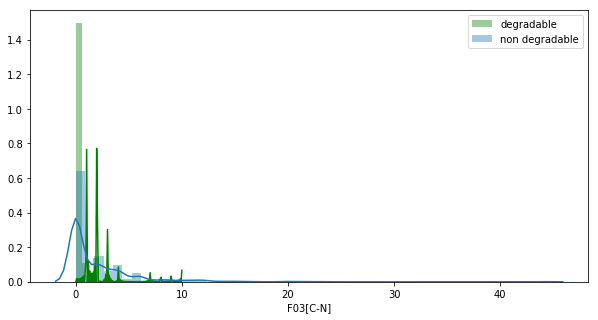

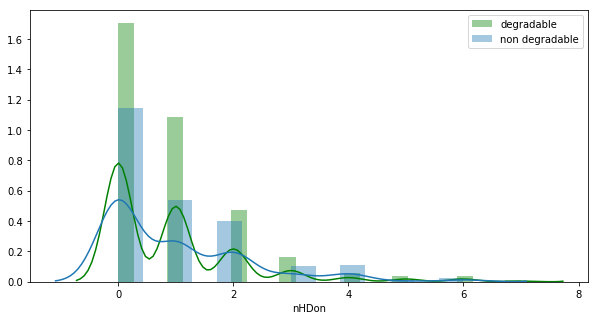

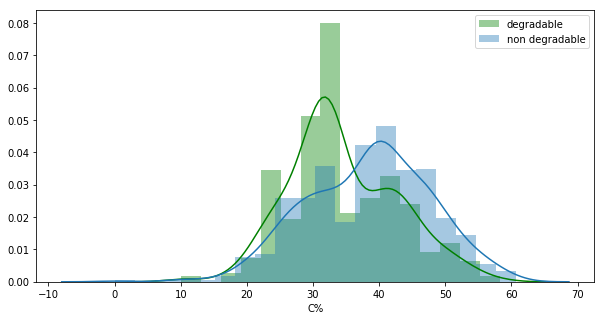

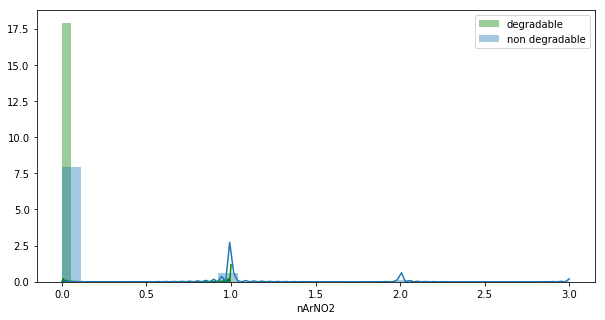

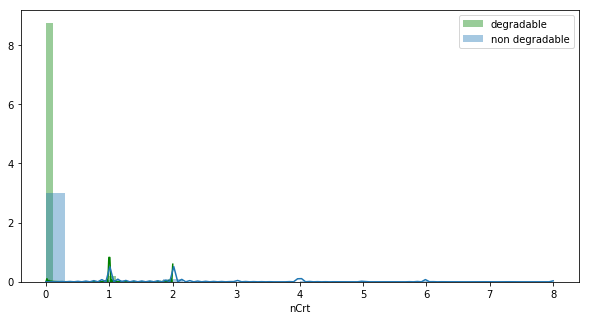

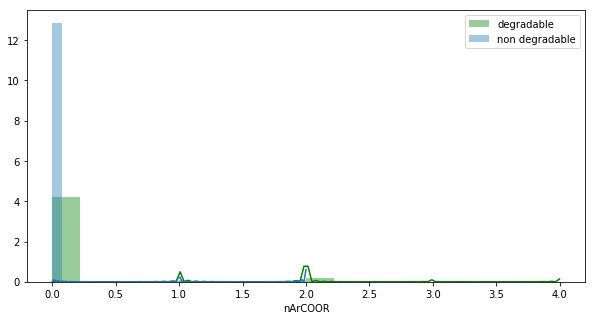

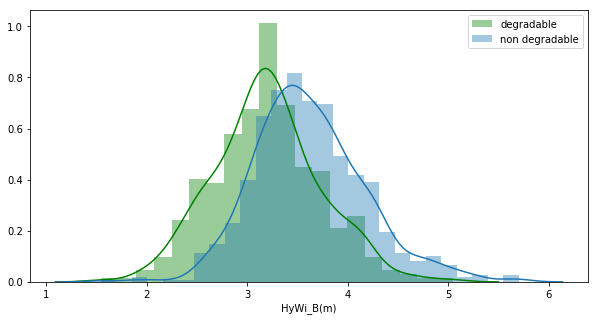

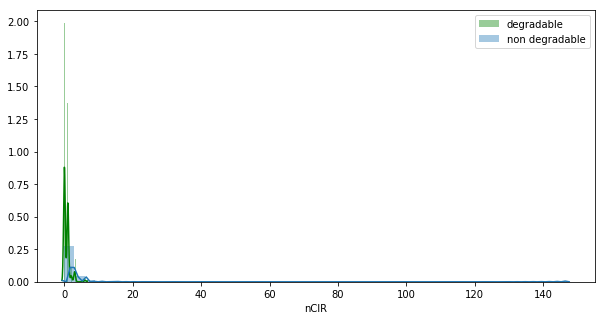

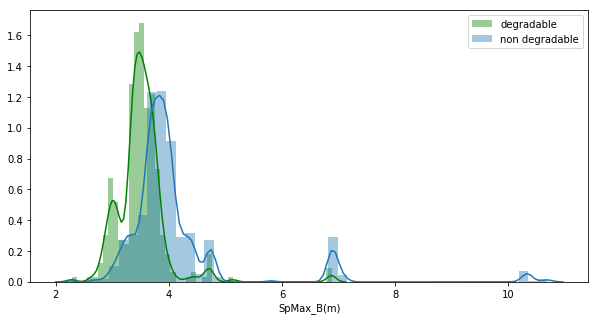

/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


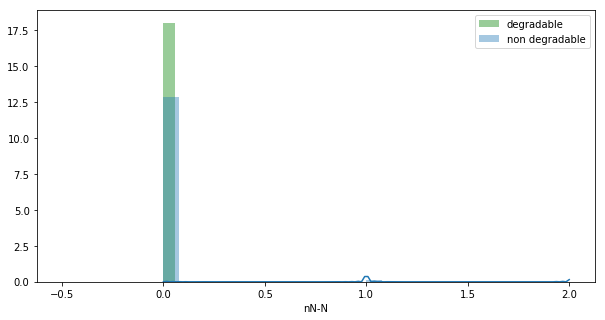

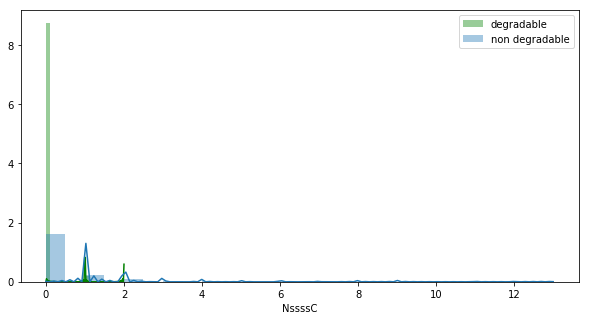

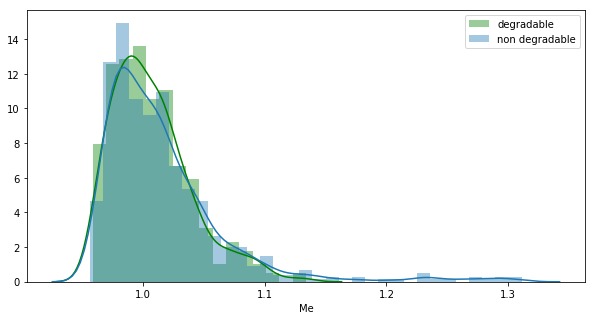

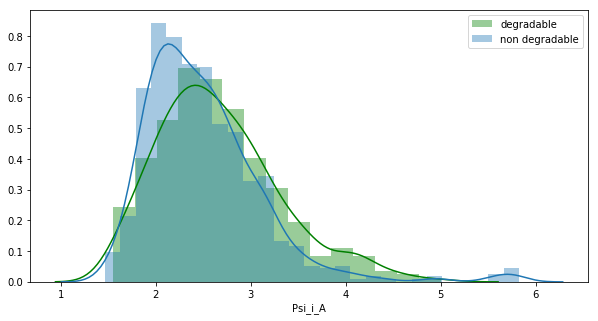

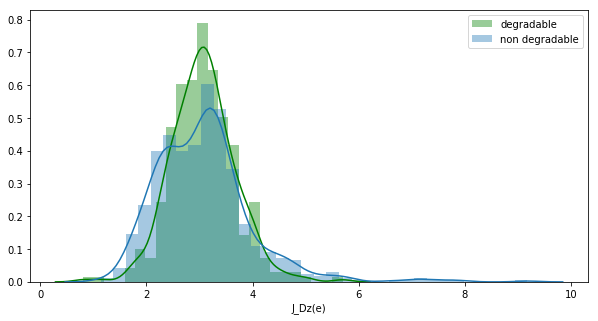

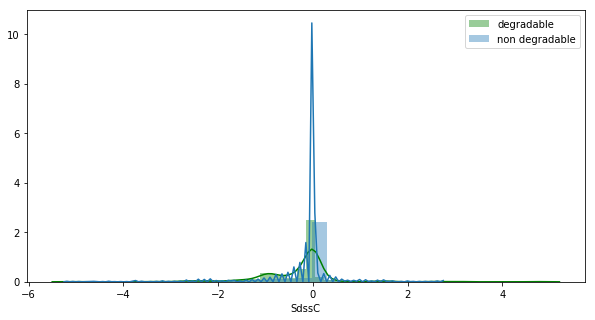

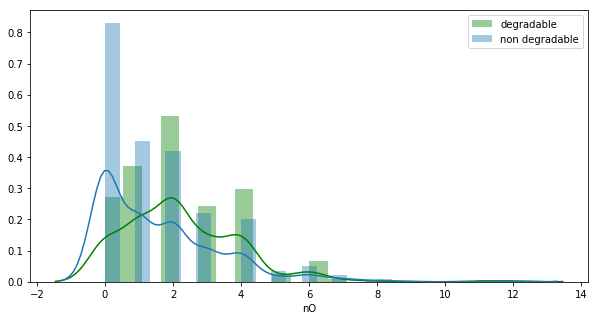

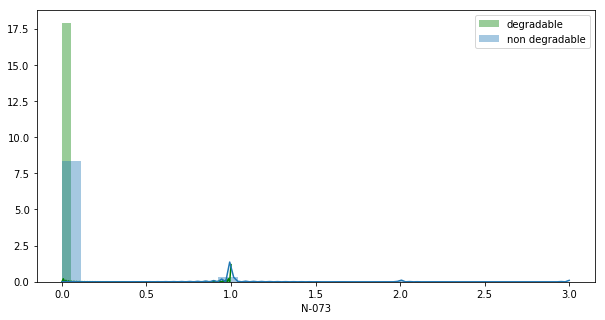

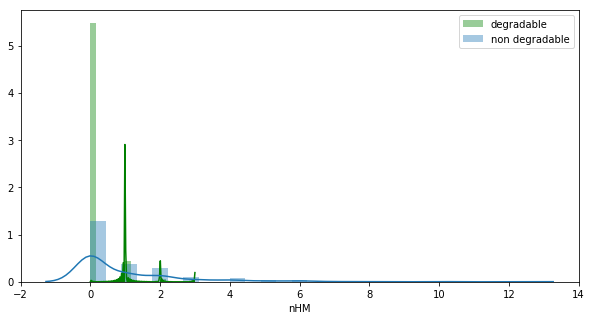

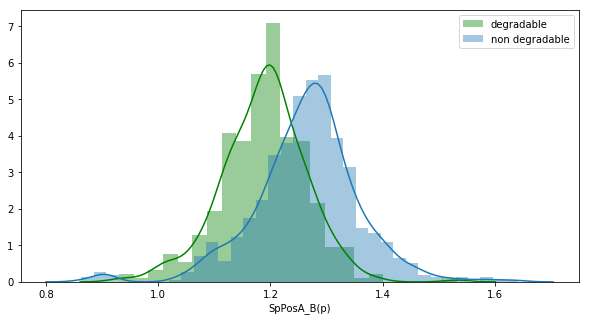

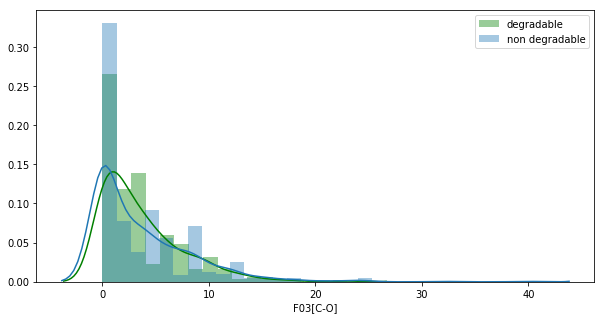

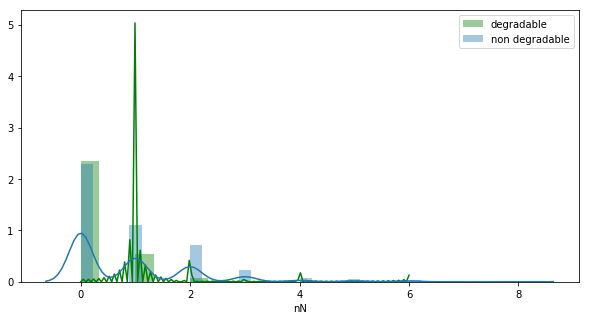

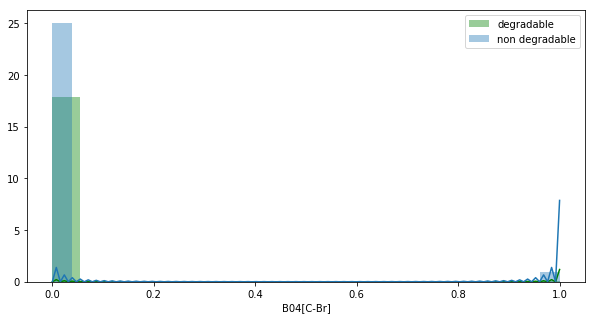

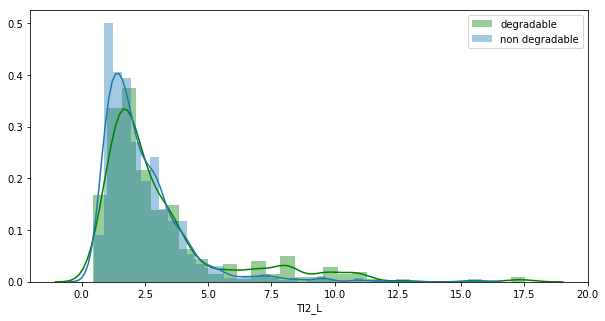

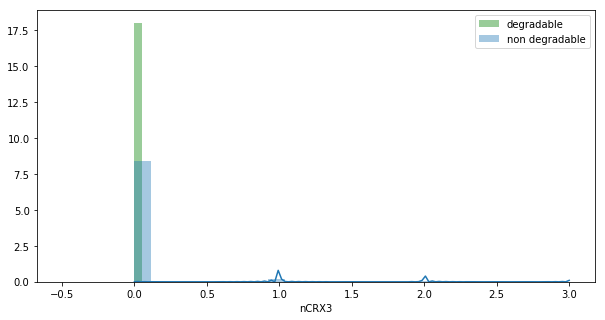

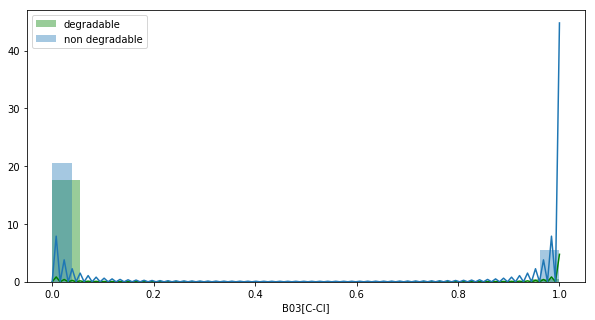

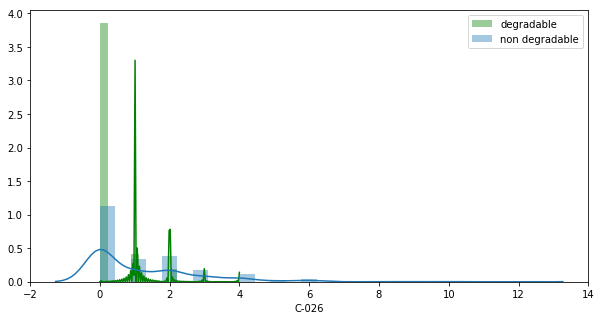

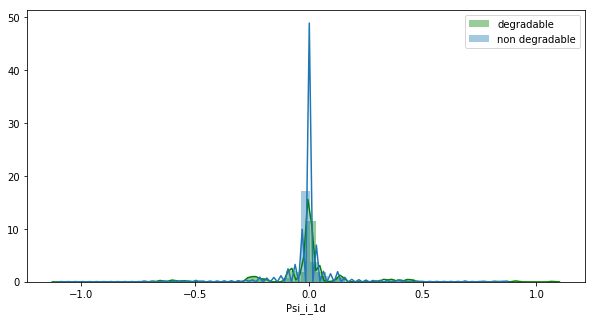

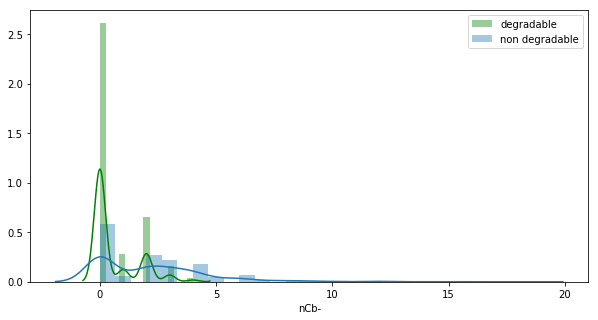

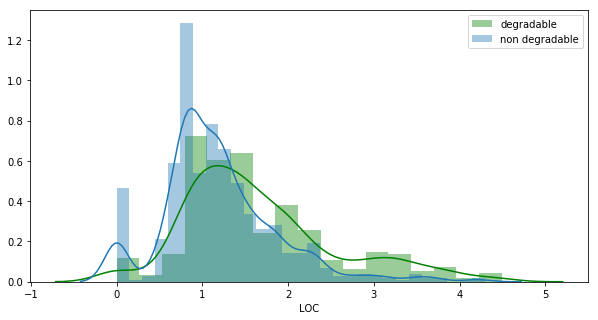

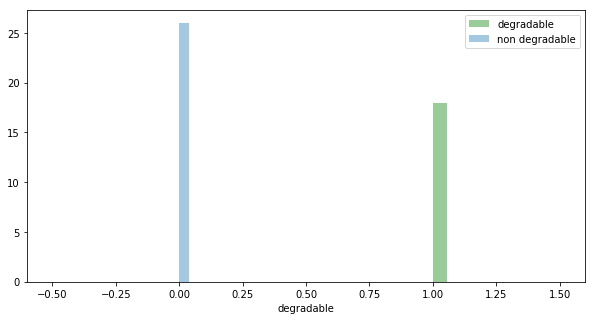

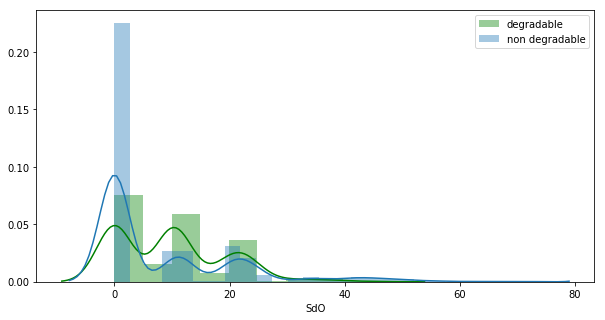

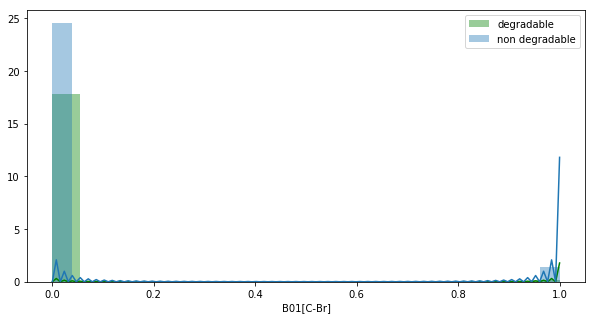

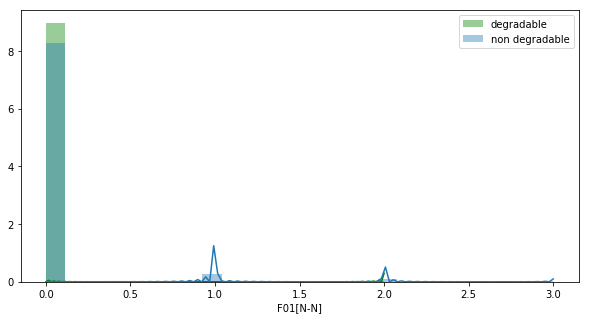

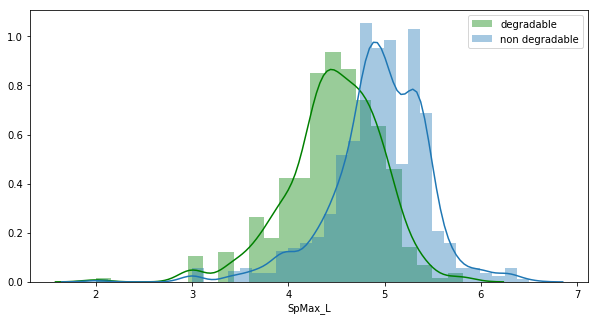

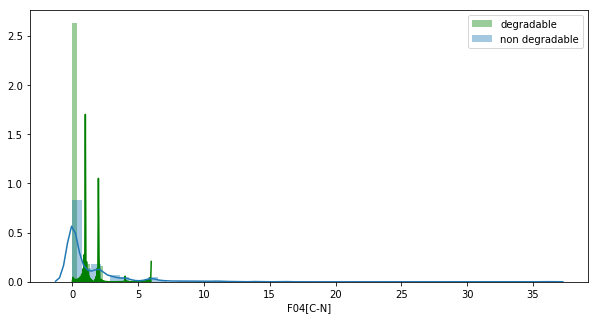

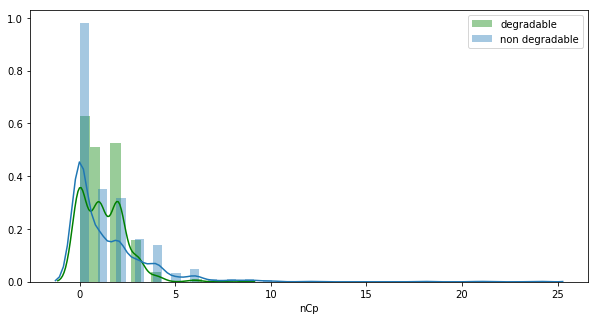

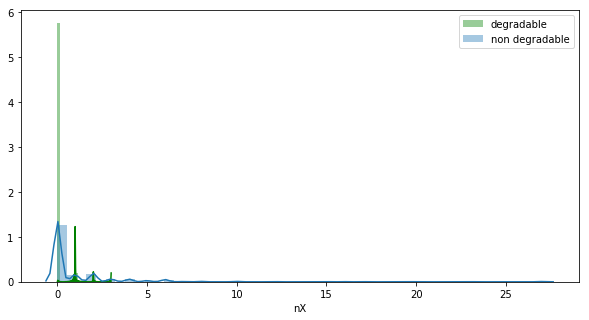

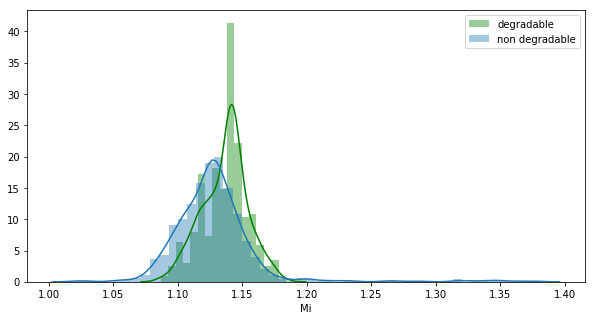

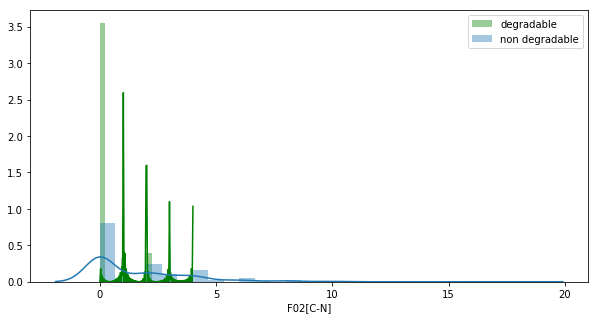

In [25]:
features = corr_keep
for col in list(filter(lambda x: x != "diagnosis", features)):
    sns.distplot(bio_df[col] ,label = "degradable", color = "g")
    sns.distplot(no_bio_df[col], label = "non degradable" )
    plt.legend()
    plt.show()

In [24]:
features = corr_keep
for col in features:
    print(col)
    valc = df[col].value_counts(normalize = True)
    if len(valc)<10:
        print(valc)
    else:
        print("probably not categorical")

Mi
probably not categorical
nCIR
probably not categorical
nHM
probably not categorical
SpMax_L
probably not categorical
nX
probably not categorical
nCb-
probably not categorical
TI2_L
probably not categorical
nCrt
0    0.942180
1    0.022749
2    0.020853
4    0.007583
6    0.002844
3    0.001896
8    0.000948
5    0.000948
Name: nCrt, dtype: float64
Psi_i_A
probably not categorical
nArCOOR
0    0.971564
2    0.018009
1    0.008531
4    0.000948
3    0.000948
Name: nArCOOR, dtype: float64
SdssC
probably not categorical
F03[C-O]
probably not categorical
nHDon
0    0.486256
1    0.254976
2    0.158294
3    0.044550
4    0.036967
6    0.011374
5    0.006635
7    0.000948
Name: nHDon, dtype: float64
C-026
probably not categorical
nN
0    0.600948
1    0.224645
2    0.111848
3    0.036019
4    0.012322
6    0.006635
5    0.006635
8    0.000948
Name: nN, dtype: float64
SpPosA_B(p)
probably not categorical
SpMax_B(m)
probably not categorical
F01[N-N]
0    0.968720
1    0.020853
2    0.009479


# Feature Engineering

In [25]:
df.shape

(1055, 42)

In [26]:
description_df.sort_values("short")

,short,description
23,B01[C-Br],Presence/absence of C - Br at topological dist...
24,B03[C-Cl],Presence/absence of C - Cl at topological dist...
28,B04[C-Br],Presence/absence of C - Br at topological dist...
7,C%,Percentage of C atoms
32,C-026,R--CX--R
3,F01[N-N],Frequency of N-N at topological distance 1
33,F02[C-N],Frequency of C - N at topological distance 2
10,F03[C-N],Frequency of C-N at topological distance 3
15,F03[C-O],Frequency of C - O at topological distance 3
4,F04[C-N],Frequency of C-N at topological distance 4


In [27]:
def encode_nHM(x):
    if x == 0:
        return "light"
    if x == 1:
        return "functional"
    if x >1:
        return "heavy"

In [28]:
df["nHM_enc"] = df["nHM"].apply(encode_nHM)

In [29]:
df.groupby(["nHM_enc","degradable"]).count()

short                  SpMax_L  J_Dz(e)  nHM  F01[N-N]  F04[C-N]  NssssC  \
nHM_enc    degradable                                                      
functional 0               116      116  116       116       116     116   
           1                26       26   26        26        26      26   
heavy      0               181      181  181       181       181     181   
           1                 5        5    5         5         5       5   
light      0               402      402  402       402       402     402   
           1               325      325  325       325       325     325   

short                  nCb-   C%  nCp   nO  F03[C-N]  SdssC  HyWi_B(m)  LOC  \
nHM_enc    degradable                                                         
functional 0            116  116  116  116       116    116        116  116   
           1             26   26   26   26        26     26         26   26   
heavy      0            181  181  181  181       181    181        181  181   
           1              5    5    5    5         5      5          5    5   
light      0            402  402  402  402       402    402        402  402   
           1            325  325  325  325       325    325        325  325   

short                  SM6_L  F03[C-O]   Me   Mi  nN-N  nArNO2  nCRX3  \
nHM_enc    degradable                                                   
functional 0             116       116  116  116   116     116    116   
           1              26        26   26   26    26      26     26   
heavy      0             181       181  181  181   181     181    181   
           1               5         5    5    5     5       5      5   
light      0             402       402  402  402   402     402    402   
           1             325       325  325  325   325     325    325   

short                  SpPosA_B(p)  nCIR  B01[C-Br]  B03[C-Cl]  N-073  \
nHM_enc    degradable                                                   
functional 0                   116   116        116        116    116   
           1                    26    26         26         26     26   
heavy      0                   181   181        181        181    181   
           1                     5     5          5          5      5   
light      0                   402   402        402        402    402   
           1                   325   325        325        325    325   

short                  SpMax_A  Psi_i_1d  B04[C-Br]  SdO  TI2_L  nCrt  C-026  \
nHM_enc    degradable                                                          
functional 0               116       116        116  116    116   116    116   
           1                26        26         26   26     26    26     26   
heavy      0               181       181        181  181    181   181    181   
           1                 5         5          5    5      5     5      5   
light      0               402       402        402  402    402   402    402   
           1               325       325        325  325    325   325    325   

short                  F02[C-N]  nHDon  SpMax_B(m)  Psi_i_A   nN  SM6_B(m)  \
nHM_enc    degradable                                                        
functional 0                116    116         116      116  116       116   
           1                 26     26          26       26   26        26   
heavy      0                181    181         181      181  181       181   
           1                  5      5           5        5    5         5   
light      0                402    402         402      402  402       402   
           1                325    325         325      325  325       325   

short                  nArCOOR   nX  
nHM_enc    degradable                
functional 0               116  116  
           1                26   26  
heavy      0               181  181  
           1                 5    5  
light      0               402  402  
           1               325  325

In [30]:
nHM_dummies = pd.get_dummies(df["nHM_enc"],"nHM").drop("nHM_light",axis = 1)
df = pd.concat([df,nHM_dummies], axis = 1).drop("nHM_enc", axis = 1)

In [31]:
def shape_class(x):
    if x == 0:
        return "ring"
    if x == 1:
        return "semi_ring"
    if x == 2:
        return "linear"
    if x >2:
        return "branched"

In [32]:
df["molShape"] = df["nCp"].apply(shape_class)

In [33]:
df.groupby(["molShape","degradable"]).count()

SpMax_L  J_Dz(e)  nHM  F01[N-N]  F04[C-N]  NssssC  nCb-  \
molShape  degradable                                                            
branched  0               145      145  145       145       145     145   145   
          1                40       40   40        40        40      40    40   
linear    0               107      107  107       107       107     107   107   
          1               100      100  100       100       100     100   100   
ring      0               329      329  329       329       329     329   329   
          1               119      119  119       119       119     119   119   
semi_ring 0               118      118  118       118       118     118   118   
          1                97       97   97        97        97      97    97   

                       C%  nCp   nO  F03[C-N]  SdssC  HyWi_B(m)  LOC  SM6_L  \
molShape  degradable                                                          
branched  0           145  145  145       145    145        145  145    145   
          1            40   40   40        40     40         40   40     40   
linear    0           107  107  107       107    107        107  107    107   
          1           100  100  100       100    100        100  100    100   
ring      0           329  329  329       329    329        329  329    329   
          1           119  119  119       119    119        119  119    119   
semi_ring 0           118  118  118       118    118        118  118    118   
          1            97   97   97        97     97         97   97     97   

                      F03[C-O]   Me   Mi  nN-N  nArNO2  nCRX3  SpPosA_B(p)  \
molShape  degradable                                                         
branched  0                145  145  145   145     145    145          145   
          1                 40   40   40    40      40     40           40   
linear    0                107  107  107   107     107    107          107   
          1                100  100  100   100     100    100          100   
ring      0                329  329  329   329     329    329          329   
          1                119  119  119   119     119    119          119   
semi_ring 0                118  118  118   118     118    118          118   
          1                 97   97   97    97      97     97           97   

                      nCIR  B01[C-Br]  B03[C-Cl]  N-073  SpMax_A  Psi_i_1d  \
molShape  degradable                                                         
branched  0            145        145        145    145      145       145   
          1             40         40         40     40       40        40   
linear    0            107        107        107    107      107       107   
          1            100        100        100    100      100       100   
ring      0            329        329        329    329      329       329   
          1            119        119        119    119      119       119   
semi_ring 0            118        118        118    118      118       118   
          1             97         97         97     97       97        97   

                      B04[C-Br]  SdO  TI2_L  nCrt  C-026  F02[C-N]  nHDon  \
molShape  degradable                                                        
branched  0                 145  145    145   145    145       145    145   
          1                  40   40     40    40     40        40     40   
linear    0                 107  107    107   107    107       107    107   
          1                 100  100    100   100    100       100    100   
ring      0                 329  329    329   329    329       329    329   
          1                 119  119    119   119    119       119    119   
semi_ring 0                 118  118    118   118    118       118    118   
          1                  97   97     97    97     97        97     97   

                      SpMax_B(m)  Psi_i_A   nN  SM6_B(m)  nArCOOR   nX  \
molShape  deg

In [34]:
mS_dummies = pd.get_dummies(df["molShape"],"mS").drop("mS_semi_ring",axis = 1)
df = pd.concat([df,mS_dummies], axis = 1).drop("molShape",axis = 1)

In [35]:
df["esther"] = df.nArCOOR.apply(lambda x: 1 if x>0 else x)

In [36]:
df.dtypes.value_counts()

int64      26
float64    17
uint8       5
dtype: int64

In [37]:
#df.to_csv("df_engineered.csv", index=False)
#df = pd.read_csv("df_engineered.csv")

In [38]:
df.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable,nHM_functional,nHM_heavy,mS_branched,mS_linear,mS_ring,esther
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,1,0,0,0,1,0,0
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,1,0,0,0,0,0,0
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1,0,0,0,1,0,0
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,1,0,0,0,0,1,0
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1,0,0,0,1,0,0


## Train_Test_Split

In [39]:
#remove coliear columns
keep = list(set(df.columns) - set(corr_drop))

In [40]:
y = df.degradable
X = df[keep].drop("degradable", axis = 1)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train , y_test = train_test_split(X,y ,random_state=42 , test_size = 0.3)

In [43]:
X_train.shape, X_test.shape

((738, 44), (317, 44))

In [44]:
y_train.shape , y_test.shape

((738,), (317,))

In [45]:
X_train.head()

,Mi,nCIR,nHM,SpMax_L,mS_linear,nX,mS_branched,nCb-,TI2_L,nCrt,Psi_i_A,nArCOOR,SdssC,F03[C-O],esther,nHDon,nHM_heavy,C-026,nN,SpPosA_B(p),SpMax_B(m),F01[N-N],NssssC,nO,Psi_i_1d,SdO,LOC,B01[C-Br],B04[C-Br],nCRX3,mS_ring,F03[C-N],HyWi_B(m),Me,nN-N,N-073,F02[C-N],nHM_functional,C%,B03[C-Cl],J_Dz(e),nArNO2,nCp,F04[C-N]
310,1.125,3,0,5.149,0,0,0,3,2.814,2,1.825,0,0.0,4,0,1,0,1,0,1.238,3.767,0,0,1,0.000,0.0,0.447,0,0,0,1,0,3.783,0.974,0,0,0,0,40.0,0,1.8559,0,0,0
493,1.109,3,0,5.003,0,0,0,3,1.075,0,2.364,0,0.0,2,0,1,0,1,1,1.295,3.895,0,0,1,0.004,0.0,0.629,0,0,0,1,3,3.367,1.004,0,0,3,0,50.0,0,3.0607,0,0,1
104,1.143,0,0,3.950,1,0,0,0,5.698,0,1.857,0,0.0,1,0,1,0,0,0,1.180,2.976,0,0,1,-0.002,0.0,2.807,0,0,0,0,0,3.364,0.969,0,0,0,0,31.0,0,2.7989,0,2,0
97,1.161,0,0,4.170,0,0,1,0,1.542,0,2.167,0,0.0,0,0,2,0,0,1,1.133,2.983,0,0,0,0.322,0.0,0.971,0,0,0,0,2,2.373,0.970,0,0,1,0,25.0,0,2.6070,0,3,0
328,1.103,1,2,4.783,0,2,0,2,1.358,0,2.340,0,0.0,0,0,0,1,1,0,1.346,3.927,0,0,0,-0.025,0.0,1.187,0,0,0,0,0,3.439,1.012,0,0,0,0,46.7,1,3.1253,0,1,0


## Transformation

In [46]:
from sklearn.preprocessing import StandardScaler

### Poly

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
poly = PolynomialFeatures(2,include_bias = False)
poly.fit(X_train)
X_train_poly = (pd.DataFrame(poly.transform(X_train),columns = poly.get_feature_names(X_train.columns)))
X_test_poly = (pd.DataFrame(poly.transform(X_test),columns = poly.get_feature_names(X_train.columns)))

In [49]:
scaler_poly = StandardScaler()
scaler_poly.fit(X_train_poly)
X_train_poly = pd.DataFrame(scaler_poly.transform(X_train_poly),columns = X_train_poly.columns)
X_test_poly = pd.DataFrame(scaler_poly.transform(X_test_poly),columns = X_train_poly.columns)

### Linear

In [50]:
scaler_lin = StandardScaler()
scaler_lin.fit(X_train)
X_train = pd.DataFrame(scaler_lin.transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler_lin.transform(X_test),columns = X_train.columns)

/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [51]:
lin_cols_all = X_train.columns
X_train.to_csv("X_train_lin_scaled.csv", index=False)
X_test.to_csv("X_test_lin_scaled.csv", index=False)

# Feature Selection

In [52]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

## Basemodel

### Logistic Regression

/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized confusion matrix
[[0.89952153 0.10047847]
 [0.13888889 0.86111111]]


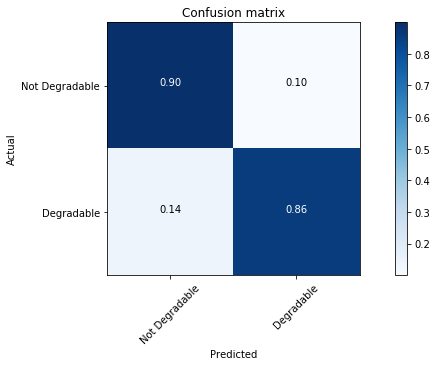

Our Accuracy is: 0.886435331230284
Our Precision is: 0.8157894736842105
Our Sensitivity is: 0.8611111111111112
Our F-Score is: 0.8378378378378377


{'accuracy': 0.886435331230284,
 'precission': 0.8157894736842105,
 'sensitivity': 0.8611111111111112,
 'f_1': 0.8378378378378377,
 'confusion_matrix': array([[188,  21],
        [ 15,  93]])}

In [53]:
logReg_base = LogisticRegression(random_state=42)

logReg_base.fit(X_train,y_train)
logReg_base_pred = logReg_base.predict(X_test)
evaluate_classifier(y_test,logReg_base_pred, normalize=True)

# Modeling

## Linear

## Logistic Regression

Normalized confusion matrix
[[0.89473684 0.10526316]
 [0.13888889 0.86111111]]


/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


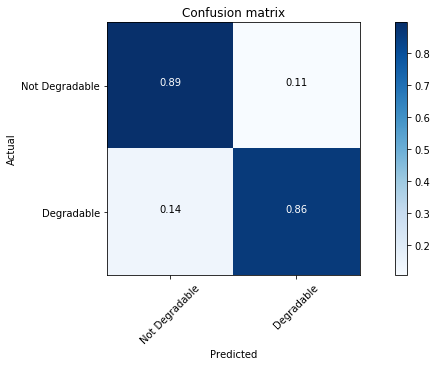

Our Accuracy is: 0.8832807570977917
Our Precision is: 0.808695652173913
Our Sensitivity is: 0.8611111111111112
Our F-Score is: 0.8340807174887893


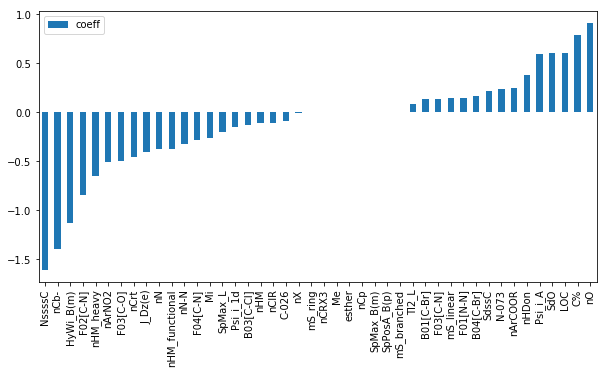

In [54]:
logReg_base_l1 = LogisticRegression(solver = "saga", penalty = "l1", C = 0.7, random_state=42)

logReg_base_l1.fit(X_train,y_train)
logReg_base_l1_pred = logReg_base_l1.predict(X_test)
evaluate_classifier(y_test,logReg_base_l1_pred, normalize=True)
drop_l1 = plot_coefs(X_train,logReg_base_l1)

In [55]:
l1_keep = list(set(X_train.columns) - set(drop_l1))
l1_keep

['Mi',
 'nCIR',
 'nHM',
 'SpMax_L',
 'mS_linear',
 'nX',
 'nCb-',
 'Psi_i_A',
 'TI2_L',
 'nCrt',
 'nArCOOR',
 'SdssC',
 'F03[C-O]',
 'nHDon',
 'nHM_heavy',
 'C-026',
 'nN',
 'F01[N-N]',
 'NssssC',
 'nO',
 'Psi_i_1d',
 'SdO',
 'LOC',
 'B01[C-Br]',
 'B04[C-Br]',
 'F03[C-N]',
 'HyWi_B(m)',
 'nN-N',
 'N-073',
 'F02[C-N]',
 'nHM_functional',
 'C%',
 'B03[C-Cl]',
 'J_Dz(e)',
 'nArNO2',
 'F04[C-N]']

## Random Forrest

In [56]:
from sklearn.ensemble import RandomForestClassifier

Normalized confusion matrix
[[0.92344498 0.07655502]
 [0.24074074 0.75925926]]


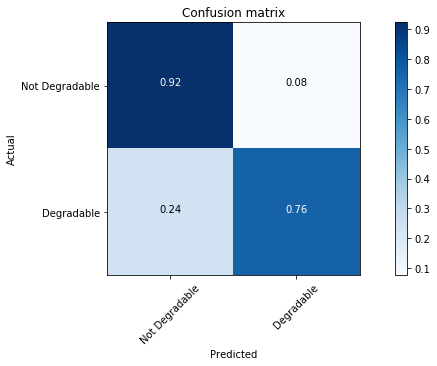

Our Accuracy is: 0.8675078864353313
Our Precision is: 0.8367346938775511
Our Sensitivity is: 0.7592592592592593
Our F-Score is: 0.796116504854369


In [57]:
forest_base = RandomForestClassifier(n_estimators=100, random_state=42)

forest_base.fit(X_train,y_train)
forest_base_pred = forest_base.predict(X_test)
evaluate_classifier(y_test,forest_base_pred, normalize=True);

## KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

Normalized confusion matrix
[[0.81818182 0.18181818]
 [0.18518519 0.81481481]]


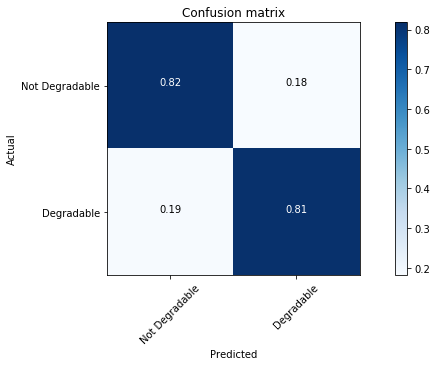

Our Accuracy is: 0.8170347003154574
Our Precision is: 0.6984126984126984
Our Sensitivity is: 0.8148148148148148
Our F-Score is: 0.7521367521367521


In [59]:
KNN_base = KNeighborsClassifier(n_neighbors = 13)

KNN_base.fit(X_train,y_train)
KNN_base_pred = KNN_base.predict(X_test)
evaluate_classifier(y_test,KNN_base_pred, normalize=True);

## Ensemble

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

In [61]:
clf1 = logReg_base_l1
clf2 = forest_base
clf3 = KNN_base
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('KNN', clf3)], voting='hard')
eclf.fit(X_train,y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'KNN', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
    print("F1: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: Convergence

F1: 0.78 (+/- 0.04) [Logistic Regression]
F1: 0.78 (+/- 0.04) [Random Forest]
F1: 0.78 (+/- 0.05) [KNN]


/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


F1: 0.80 (+/- 0.05) [Ensemble]


/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Normalized confusion matrix
[[0.90909091 0.09090909]
 [0.17592593 0.82407407]]


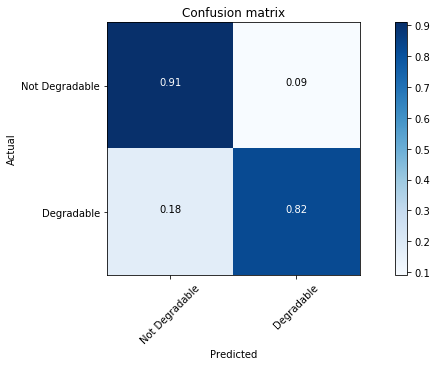

Our Accuracy is: 0.8801261829652997
Our Precision is: 0.8240740740740741
Our Sensitivity is: 0.8240740740740741
Our F-Score is: 0.8240740740740741


In [62]:
eclf_base_pred = eclf.predict(X_test)
evaluate_classifier(y_test,eclf_base_pred, normalize=True);

## Poly

## Logistic Regression

In [63]:
X_train = X_train_poly.copy()
X_test = X_test_poly.copy()

Normalized confusion matrix
[[0.78947368 0.21052632]
 [0.10185185 0.89814815]]


/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


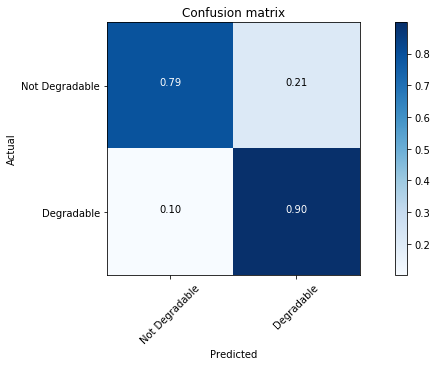

Our Accuracy is: 0.8264984227129337
Our Precision is: 0.6879432624113475
Our Sensitivity is: 0.8981481481481481
Our F-Score is: 0.7791164658634538


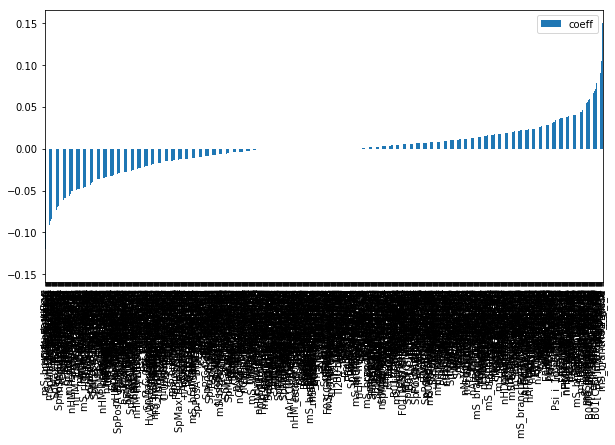

In [64]:
logReg_base_l1_poly = LogisticRegression(solver = "saga", penalty = "l1", C = 1, random_state=42)

logReg_base_l1_poly.fit(X_train_poly,y_train)
logReg_base_l1_poly_pred = logReg_base_l1_poly.predict(X_test_poly)
evaluate_classifier(y_test,logReg_base_l1_poly_pred, normalize=True)
drop_l1_poly = plot_coefs(X_train_poly,logReg_base_l1_poly)

## Random Forrest

Normalized confusion matrix
[[0.90909091 0.09090909]
 [0.21296296 0.78703704]]


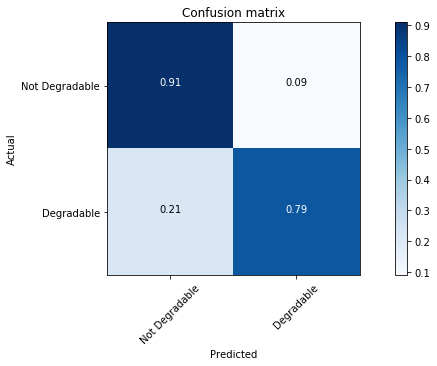

Our Accuracy is: 0.8675078864353313
Our Precision is: 0.8173076923076923
Our Sensitivity is: 0.7870370370370371
Our F-Score is: 0.8018867924528303


In [65]:

forest_base = RandomForestClassifier(n_estimators=100, random_state=42)

forest_base.fit(X_train,y_train)
forest_base_pred = forest_base.predict(X_test)
evaluate_classifier(y_test,forest_base_pred, normalize=True);

In [66]:
rfc_featimp_df = pd.DataFrame(forest_base.feature_importances_, index = X_train.columns)
sorted_rfc = rfc_featimp_df.sort_values(by = 0, ascending = False)
rfc_add = list(sorted_rfc[sorted_rfc[0]>0.01].head(3).index)
rfc_add

['Mi SpMax_B(m)', 'SpPosA_B(p) SpMax_B(m)', 'Mi SpPosA_B(p)']

## KNN

Normalized confusion matrix
[[0.80382775 0.19617225]
 [0.15740741 0.84259259]]


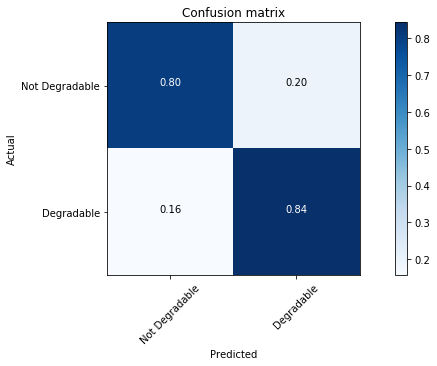

Our Accuracy is: 0.8170347003154574
Our Precision is: 0.6893939393939394
Our Sensitivity is: 0.8425925925925926
Our F-Score is: 0.7583333333333334


In [67]:

KNN_base = KNeighborsClassifier(n_neighbors = 13)

KNN_base.fit(X_train,y_train)
KNN_base_pred = KNN_base.predict(X_test)
evaluate_classifier(y_test,KNN_base_pred, normalize=True);

## Ensemble

In [68]:

clf1 = logReg_base_l1
clf2 = forest_base
clf3 = KNN_base
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('KNN', clf3)], voting='hard')
eclf.fit(X_train,y_train)

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'KNN', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
    print("F1: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: Convergence

F1: 0.76 (+/- 0.03) [Logistic Regression]
F1: 0.79 (+/- 0.04) [Random Forest]
F1: 0.73 (+/- 0.03) [KNN]


/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: Convergence

F1: 0.79 (+/- 0.04) [Ensemble]


Normalized confusion matrix
[[0.84688995 0.15311005]
 [0.14814815 0.85185185]]


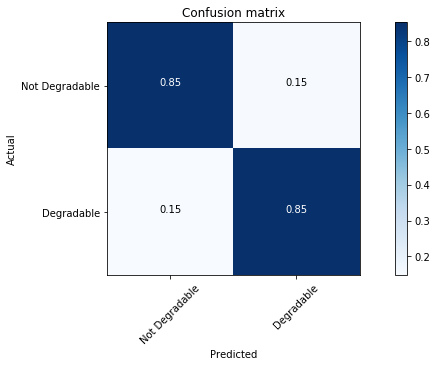

Our Accuracy is: 0.8485804416403786
Our Precision is: 0.7419354838709677
Our Sensitivity is: 0.8518518518518519
Our F-Score is: 0.7931034482758621


In [69]:
eclf_base_pred = eclf.predict(X_test)
evaluate_classifier(y_test,eclf_base_pred, normalize=True);

# Model Selection

In [70]:
def compare_models(results_dict_list):
    res_df = pd.DataFrame(columns = results_dict_list[0].keys())
    for model in results_dict_list:
        res_df.loc[len(res_df)] = list(model.values())
    return res_df

In [71]:
res_cols = ["accuracy","precission","sensitivity","f_1"]
out_df = compare_models(results_dict_list)

In [72]:
out_df

,accuracy,precission,sensitivity,f_1,confusion_matrix
0,0.886435,0.815789,0.861111,0.837838,"[[188, 21], [15, 93]]"
1,0.883281,0.808696,0.861111,0.834081,"[[187, 22], [15, 93]]"
2,0.867508,0.836735,0.759259,0.796117,"[[193, 16], [26, 82]]"
3,0.817035,0.698413,0.814815,0.752137,"[[171, 38], [20, 88]]"
4,0.880126,0.824074,0.824074,0.824074,"[[190, 19], [19, 89]]"
5,0.826498,0.687943,0.898148,0.779116,"[[165, 44], [11, 97]]"
6,0.867508,0.817308,0.787037,0.801887,"[[190, 19], [23, 85]]"
7,0.817035,0.689394,0.842593,0.758333,"[[168, 41], [17, 91]]"
8,0.848580,0.741935,0.851852,0.793103,"[[177, 32], [16, 92]]"


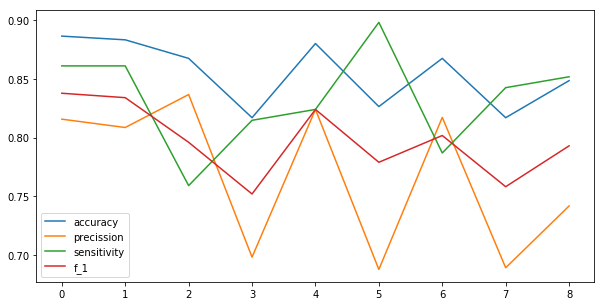

In [73]:
for col in res_cols:
    plt.plot(out_df.index, out_df[col], label = col)
    plt.legend()

In [74]:
# Since Precission is the mos desirable Value, Model 2 - Linear Random Forrest ist chosen

# Model Optimization

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
X_train_poly.head()

,Mi,nCIR,nHM,SpMax_L,mS_linear,nX,mS_branched,nCb-,TI2_L,nCrt,Psi_i_A,nArCOOR,SdssC,F03[C-O],esther,nHDon,nHM_heavy,C-026,nN,SpPosA_B(p),SpMax_B(m),F01[N-N],NssssC,nO,Psi_i_1d,SdO,LOC,B01[C-Br],B04[C-Br],nCRX3,mS_ring,F03[C-N],HyWi_B(m),Me,nN-N,N-073,F02[C-N],nHM_functional,C%,B03[C-Cl],J_Dz(e),nArNO2,nCp,F04[C-N],Mi^2,Mi nCIR,Mi nHM,Mi SpMax_L,Mi mS_linear,Mi nX,Mi mS_branched,Mi nCb-,Mi TI2_L,Mi nCrt,Mi Psi_i_A,Mi nArCOOR,Mi SdssC,Mi F03[C-O],Mi esther,Mi nHDon,Mi nHM_heavy,Mi C-026,Mi nN,Mi SpPosA_B(p),Mi SpMax_B(m),Mi F01[N-N],Mi NssssC,Mi nO,Mi Psi_i_1d,Mi SdO,Mi LOC,Mi B01[C-Br],Mi B04[C-Br],Mi nCRX3,Mi mS_ring,Mi F03[C-N],Mi HyWi_B(m),Mi Me,Mi nN-N,Mi N-073,Mi F02[C-N],Mi nHM_functional,Mi C%,Mi B03[C-Cl],Mi J_Dz(e),Mi nArNO2,Mi nCp,Mi F04[C-N],nCIR^2,nCIR nHM,nCIR SpMax_L,nCIR mS_linear,nCIR nX,nCIR mS_branched,nCIR nCb-,nCIR TI2_L,nCIR nCrt,nCIR Psi_i_A,nCIR nArCOOR,nCIR SdssC,nCIR F03[C-O],nCIR esther,nCIR nHDon,nCIR nHM_heavy,nCIR C-026,nCIR nN,nCIR SpPosA_B(p),nCIR SpMax_B(m),nCIR F01[N-N],nCIR NssssC,nCIR nO,nCIR Psi_i_1d,nCIR SdO,nCIR LOC,nCIR B01[C-Br],nCIR B04[C-Br],nCIR nCRX3,nCIR mS_ring,nCIR F03[C-N],nCIR HyWi_B(m),nCIR Me,nCIR nN-N,nCIR N-073,nCIR F02[C-N],nCIR nHM_functional,nCIR C%,nCIR B03[C-Cl],nCIR J_Dz(e),nCIR nArNO2,nCIR nCp,nCIR F04[C-N],nHM^2,nHM SpMax_L,nHM mS_linear,nHM nX,nHM mS_branched,nHM nCb-,nHM TI2_L,nHM nCrt,nHM Psi_i_A,nHM nArCOOR,nHM SdssC,nHM F03[C-O],nHM esther,nHM nHDon,nHM nHM_heavy,nHM C-026,nHM nN,nHM SpPosA_B(p),nHM SpMax_B(m),...,B01[C-Br] mS_ring,B01[C-Br] F03[C-N],B01[C-Br] HyWi_B(m),B01[C-Br] Me,B01[C-Br] nN-N,B01[C-Br] N-073,B01[C-Br] F02[C-N],B01[C-Br] nHM_functional,B01[C-Br] C%,B01[C-Br] B03[C-Cl],B01[C-Br] J_Dz(e),B01[C-Br] nArNO2,B01[C-Br] nCp,B01[C-Br] F04[C-N],B04[C-Br]^2,B04[C-Br] nCRX3,B04[C-Br] mS_ring,B04[C-Br] F03[C-N],B04[C-Br] HyWi_B(m),B04[C-Br] Me,B04[C-Br] nN-N,B04[C-Br] N-073,B04[C-Br] F02[C-N],B04[C-Br] nHM_functional,B04[C-Br] C%,B04[C-Br] B03[C-Cl],B04[C-Br] J_Dz(e),B04[C-Br] nArNO2,B04[C-Br] nCp,B04[C-Br] F04[C-N],nCRX3^2,nCRX3 mS_ring,nCRX3 F03[C-N],nCRX3 HyWi_B(m),nCRX3 Me,nCRX3 nN-N,nCRX3 N-073,nCRX3 F02[C-N],nCRX3 nHM_functional,nCRX3 C%,nCRX3 B03[C-Cl],nCRX3 J_Dz(e),nCRX3 nArNO2,nCRX3 nCp,nCRX3 F04[C-N],mS_ring^2,mS_ring F03[C-N],mS_ring HyWi_B(m),mS_ring Me,mS_ring nN-N,mS_ring N-073,mS_ring F02[C-N],mS_ring nHM_functional,mS_ring C%,mS_ring B03[C-Cl],mS_ring J_Dz(e),mS_ring nArNO2,mS_ring nCp,mS_ring F04[C-N],F03[C-N]^2,F03[C-N] HyWi_B(m),F03[C-N] Me,F03[C-N] nN-N,F03[C-N] N-073,F03[C-N] F02[C-N],F03[C-N] nHM_functional,F03[C-N] C%,F03[C-N] B03[C-Cl],F03[C-N] J_Dz(e),F03[C-N] nArNO2,F03[C-N] nCp,F03[C-N] F04[C-N],HyWi_B(m)^2,HyWi_B(m) Me,HyWi_B(m) nN-N,HyWi_B(m) N-073,HyWi_B(m) F02[C-N],HyWi_B(m) nHM_functional,HyWi_B(m) C%,HyWi_B(m) B03[C-Cl],HyWi_B(m) J_Dz(e),HyWi_B(m) nArNO2,HyWi_B(m) nCp,HyWi_B(m) F04[C-N],Me^2,Me nN-N,Me N-073,Me F02[C-N],Me nHM_functional,Me C%,Me B03[C-Cl],Me J_Dz(e),Me nArNO2,Me nCp,Me F04[C-N],nN-N^2,nN-N N-073,nN-N F02[C-N],nN-N nHM_functional,nN-N C%,nN-N B03[C-Cl],nN-N J_Dz(e),nN-N nArNO2,nN-N nCp,nN-N F04[C-N],N-073^2,N-073 F02[C-N],N-073 nHM_functional,N-073 C%,N-073 B03[C-Cl],N-073 J_Dz(e),N-073 nArNO2,N-073 nCp,N-073 F04[C-N],F02[C-N]^2,F02[C-N] nHM_functional,F02[C-N] C%,F02[C-N] B03[C-Cl],F02[C-N] J_Dz(e),F02[C-N] nArNO2,F02[C-N] nCp,F02[C-N] F04[C-N],nHM_functional^2,nHM_functional C%,nHM_functional B03[C-Cl],nHM_functional J_Dz(e),nHM_functional nArNO2,nHM_functional nCp,nHM_functional F04[C-N],C%^2,C% B03[C-Cl],C% J_Dz(e),C% nArNO2,C% nCp,C% F04[C-N],B03[C-Cl]^2,B03[C-Cl] J_Dz(e),B03[C-Cl] nArNO2,B03[C-Cl] nCp,B03[C-Cl] F04[C-N],J_Dz(e)^2,J_Dz(e) nArNO2,J_Dz(e) nCp,J_Dz(e) F04[C-N],nArNO2^2,nArNO2 nCp,nArNO2 F04[C-N],nCp^2,nCp F04[C-N],F04[C-N]^2
0,-0.213518,1.035018,-0.485445,0.672452,-0.488114,-0.311758,-0.464559,0.657605,0.054958,3.004719,-1.104649,-0.147055,0.260465,0.113564,-0.158114,0.061185,-0.453743,0.125970,-0.627448,-0.003543,-0.148035,-0.148986,-0.260897,-0.43442,-0.021437,-0.727805,-1.129774,-0.19

In [103]:
features = list(set(l1_keep).union((lin_cols_all)))
features

['Mi',
 'nCIR',
 'nHM',
 'SpMax_L',
 'mS_linear',
 'nX',
 'mS_branched',
 'nCb-',
 'Psi_i_A',
 'TI2_L',
 'nCrt',
 'nArCOOR',
 'SdssC',
 'F03[C-O]',
 'esther',
 'nHDon',
 'nHM_heavy',
 'C-026',
 'nN',
 'SpPosA_B(p)',
 'SpMax_B(m)',
 'F01[N-N]',
 'NssssC',
 'nO',
 'Psi_i_1d',
 'SdO',
 'LOC',
 'B01[C-Br]',
 'B04[C-Br]',
 'nCRX3',
 'mS_ring',
 'F03[C-N]',
 'HyWi_B(m)',
 'F02[C-N]',
 'nN-N',
 'N-073',
 'nHM_functional',
 'Me',
 'C%',
 'B03[C-Cl]',
 'J_Dz(e)',
 'nArNO2',
 'nCp',
 'F04[C-N]']

In [104]:
X_train = X_train_poly[features]
X_test = X_test_poly[features]

In [105]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Confusion Matrix, without normalization
[[186  16]
 [ 23  92]]


/Users/pietrassyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


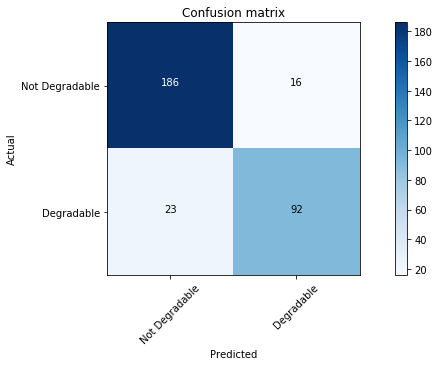

Our Accuracy is: 0.8769716088328076
Our Precision is: 0.8518518518518519
Our Sensitivity is: 0.8
Our F-Score is: 0.8251121076233184


{'accuracy': 0.8769716088328076,
 'precission': 0.8518518518518519,
 'sensitivity': 0.8,
 'f_1': 0.8251121076233184,
 'confusion_matrix': array([[186,  16],
        [ 23,  92]])}

In [106]:
lgR_2 = LogisticRegression(solver = "saga", penalty = "l1", C = 0.6, random_state=42)
lgR_2.fit(X_train,y_train)
lgR_2_pred = lgR_2.predict(X_test)
evaluate_classifier(lgR_2_pred,y_test, normalize=False)

In [107]:
X_train.columns

Index(['Mi', 'nCIR', 'nHM', 'SpMax_L', 'mS_linear', 'nX', 'mS_branched',
       'nCb-', 'Psi_i_A', 'TI2_L', 'nCrt', 'nArCOOR', 'SdssC', 'F03[C-O]',
       'esther', 'nHDon', 'nHM_heavy', 'C-026', 'nN', 'SpPosA_B(p)',
       'SpMax_B(m)', 'F01[N-N]', 'NssssC', 'nO', 'Psi_i_1d', 'SdO', 'LOC',
       'B01[C-Br]', 'B04[C-Br]', 'nCRX3', 'mS_ring', 'F03[C-N]', 'HyWi_B(m)',
       'F02[C-N]', 'nN-N', 'N-073', 'nHM_functional', 'Me', 'C%', 'B03[C-Cl]',
       'J_Dz(e)', 'nArNO2', 'nCp', 'F04[C-N]'],
      dtype='object')

<Figure size 1152x1080 with 0 Axes>

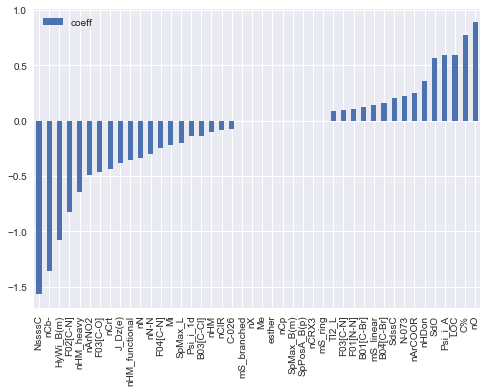

In [115]:
zeros = plot_coefs(X_train,lgR_2)

In [111]:
zeros

Index(['nX', 'Me', 'esther', 'nCp', 'SpMax_B(m)', 'SpPosA_B(p)', 'nCRX3',
       'mS_ring'],
      dtype='object')

<Figure size 1152x1080 with 0 Axes>

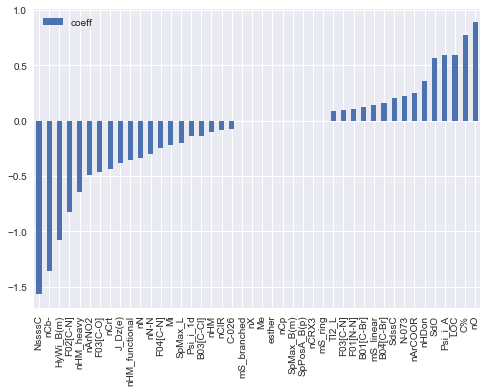

In [116]:
zeros_df = plot_coefs(X_train,lgR_2,return_nulls = False)

In [118]:
zeros_df["abs"] = zeros_df["coeff"].apply(lambda x: abs(x)) 

In [126]:
top_20_df = zeros_df.sort_values(by = "abs", ascending = False).head(20)

In [127]:
top_20_df["rank"] = list(range(1,21))

In [130]:
top_20_df[["rank","coeff"]]

,rank,coeff
NssssC,1,-1.567775
nCb-,2,-1.355981
HyWi_B(m),3,-1.082645
nO,4,0.887657
F02[C-N],5,-0.827276
C%,6,0.770061
nHM_heavy,7,-0.641827
LOC,8,0.595178
Psi_i_A,9,0.590848
SdO,10,0.567954


In [84]:
inspect = list(set(X_train.columns)-set(zeros))

In [85]:
inspect

['Mi',
 'nCIR',
 'SpMax_L',
 'mS_linear',
 'nCb-',
 'Psi_i_A',
 'TI2_L',
 'nCrt',
 'nArCOOR',
 'SdssC',
 'F03[C-O]',
 'nHDon',
 'nHM_heavy',
 'C-026',
 'nN',
 'F01[N-N]',
 'NssssC',
 'nO',
 'Psi_i_1d',
 'SdO',
 'LOC',
 'B01[C-Br]',
 'B04[C-Br]',
 'F03[C-N]',
 'HyWi_B(m)',
 'F02[C-N]',
 'nN-N',
 'N-073',
 'nHM_functional',
 'C%',
 'B03[C-Cl]',
 'J_Dz(e)',
 'nArNO2',
 'F04[C-N]']

In [ ]:
import pickle

In [ ]:
#with open("lgR_model_save.pickle" ,"wb") as f:
 #   pickle.dump(lgR_2,f) 

# Trash

In [ ]:
estimator = lgR_2
param_grid = {
    "penalty" : ["l1","l2"],
    "solver": ["saga", "liblinear"],
    "C" : [0.1,0.25,0.5,0.7,0.8,0.9,1]    
}
lgR_2_gs = GridSearchCV(estimator, 
                        param_grid,
                        scoring = "roc_auc",
                       n_jobs = -1,
                       cv = 5,
                       verbose = 4)

In [ ]:
sorted(metrics.SCORERS.keys())

In [ ]:
lgR_2_gs.fit(X_train,y_train)

In [ ]:
pred_gs = lgR_2_gs.best_estimator_.predict(X_test)
evaluate_classifier(y_test, pred_gs)

In [ ]:
rfc_features = RandomForestClassifier()
rfc_features.fit(X_train,y_train)

In [ ]:
rfc_features_pred = rfc_features.predict(X_test)

In [ ]:
evaluate_classifier(rfc_features_pred,y_test, normalize=False)

In [ ]:
import xgboost as xgb

In [ ]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.3, 
                           learning_rate = 0.1,
                           max_depth = 5, 
                           alpha = 1, 
                           n_estimators = 100,
                          random_seed = 23)

In [ ]:
def rename_func(x):
    x = x.replace("[","_")
    x = x.replace("]","_")
    x = x.replace("<","_")
    return x

In [ ]:
X_train = X_train.rename(columns =rename_func)
X_test = X_test.rename(columns =rename_func)

In [ ]:
xg_clf.fit(X_train,y_train)

In [ ]:
preds = xg_clf.predict(X_test)
evaluate_classifier(y_test, preds)

#test_f1 = f1_score(y_test, preds)
#test_acc = accuracy_score(y_test, preds)

#print("Accuracy: %f" % (test_acc))
#print("F1: %f" % (test_f1))

## Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#setup our parameters for XGBoost to test
param_test1 = {
 'max_depth':range(2,9,2),
 'min_child_weight':range(1,6,2),
    "colsample_bytree": [0.9,0.95,1]
}

In [ ]:
# initiate the Gridsearch model
gsearch1 = GridSearchCV(
    estimator = xgb.XGBClassifier( learning_rate =0.1, 
                                  n_estimators=140, 
                                  max_depth=5,
                                    min_child_weight=1, 
                                  gamma=0, 
                                  subsample=0.8, 
                                  objective= 'binary:logistic', 
                                  nthread=4, 
                                  scale_pos_weight=1, 
                                  seed=23),
                param_grid = param_test1, 
                scoring='accuracy',
                n_jobs=-1,
                iid=False, 
                cv=5,
                verbose = 4)

In [ ]:
gsearch1.fit(X_train,y_train)

In [ ]:
pred_gs = gsearch1.best_estimator_.predict(X_test)
evaluate_classifier(y_test, pred_gs)